In [1]:
import tensorflow as tf

import os
import time

from matplotlib import pyplot as plt
from IPython import display
import pickle

import numpy as np

In [2]:
infile = open('ALL_DATA','rb')
ALL_DATA = pickle.load(infile)
infile.close()

In [5]:
j = 0
for i in range(len(ALL_DATA['all_image_reel'])):
    if ALL_DATA['all_image_reel'][i].shape != ALL_DATA['all_image_segment'][i].shape:
        j = j + 1
print(j)

0


In [6]:
print(len(ALL_DATA['all_image_reel']))
all_image_reel = ALL_DATA['all_image_reel']
print(len(ALL_DATA['all_image_segment']))
all_image_segment =ALL_DATA['all_image_segment']

608
608


In [7]:
def crop_image(im_reel, im_segment, shape1, shape2):
    im_reel = [im_reel[x:x+shape1,y:y+shape2]/1.0 for x in range(0,im_reel.shape[0],shape1) for y in range(0,im_reel.shape[1],shape2)]
    im_segment = [im_segment[x:x+shape1,y:y+shape2]/1.0 for x in range(0,im_segment.shape[0],shape1) for y in range(0,im_segment.shape[1],shape2)]
    return im_reel, im_segment


In [8]:
test = crop_image(all_image_reel[0], all_image_segment[0], 64, 64)
print(len(test[0]))
print(len(test[1]))

132
132


In [9]:

def plot_crop(img):
    fig = plt.figure(figsize=(8, 8))
    columns = np.math.sqrt(256)
    rows = np.math.sqrt(256)
    for i in range(1,int(columns*rows)):
        #img = np.random.randint(10, size=(h,w))
        fig.add_subplot(int(rows), int(columns), i)
        plt.imshow(img[i], cmap='gray')
        plt.axis('off')
    plt.show()



In [10]:
im_reel, im_segment = [],[]
for i in range(608):
    im_r, im_s = crop_image(all_image_reel[i], all_image_segment[i], 64, 64)
    im_reel.append(im_r)
    im_segment.append(im_s)
    

In [11]:
a = all_image_segment[500]
j = 0
for i in range(len(all_image_segment)):
    if(all_image_segment[i].shape != all_image_reel[i].shape ):
        j = j+1
        print(all_image_segment[i].shape, all_image_reel[i].shape)
print(j)

0


In [12]:
print(len(im_reel))
print(len(im_segment))


608
608


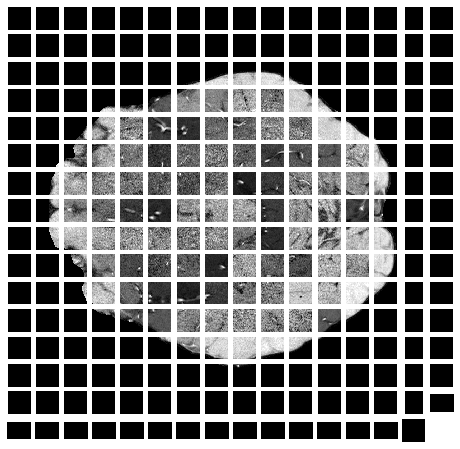

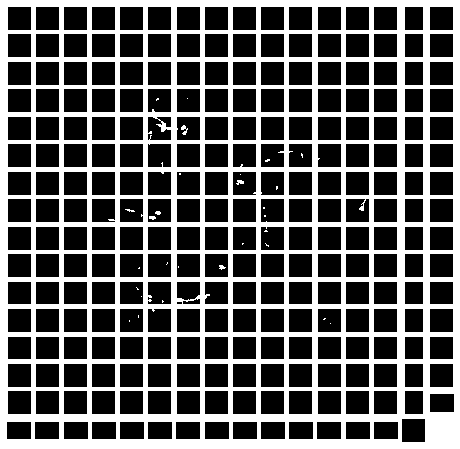

In [13]:
#i = np.random.randint(len(im_reel))

plot_crop(im_reel[500])
plot_crop(im_segment[500])

In [15]:
all_im_reel, all_im_segment = [],[]
for i in range(len(im_reel)):
    all_im_reel = all_im_reel + im_reel[i]
    all_im_segment = all_im_segment + im_segment[i]

In [16]:
print(len(all_im_reel))
print(len(all_im_segment))

82220
82220


In [68]:
new_im_reel = []
new_im_segment = []
im_reel_bruit = []
im_segment_bruit = []
for r,s in zip(all_im_reel, all_im_segment):
    if np.all(s==0.)==True and np.all(r==0.)!=True:
        im_reel_bruit.append(r)
        im_segment_bruit.append(s)
for r,s in zip(all_im_reel, all_im_segment):
    if np.all(s==0.)!=True and np.all(r==0.)!=True:
        new_im_reel.append(r)
        new_im_segment.append(s)

In [69]:

print(len(im_reel_bruit))
print(len(im_segment_bruit))
print(len(new_im_reel))
print(len(new_im_segment))

36023
36023
8678
8678


In [31]:
def plot_img(arr_img, arr_img2):    
    width=10
    height=7
    rows = 2
    cols = 4
    axes=[]
    fig = plt.figure(figsize = (width, height), constrained_layout=True)
    for a in range(int(rows*cols/2)):
        index = np.random.randint(0,len(arr_img))
        axes.append( fig.add_subplot(rows, cols, a+1) )
        
        #img_array = cv2.imread(os.path.join(DATADIR,path[img]))
        #subplot_title=(img.shape)
        axes[-1].set_title(f'image reel : {a+1}')  
        plt.imshow(arr_img[index], cmap='gray')
        axes.append( fig.add_subplot(rows, cols, a+5) )
        plt.imshow(arr_img2[index], cmap='gray')
        axes[-1].set_title(f'image segmente : {a+1}')
        
    plt.show()

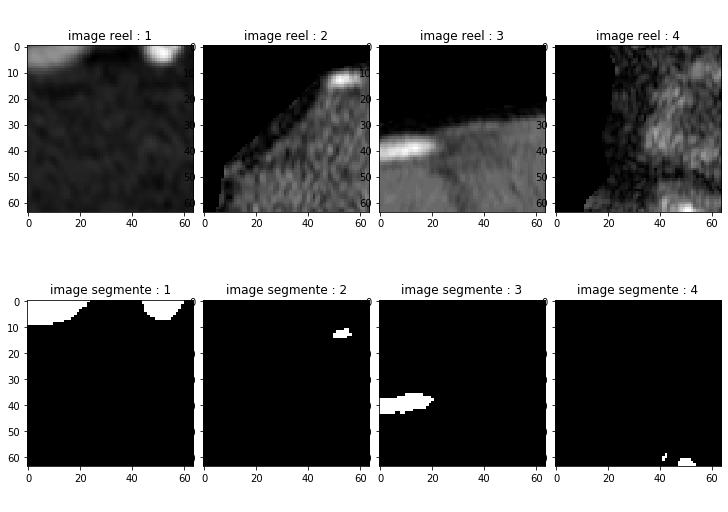

In [35]:
plot_img(new_im_reel, new_im_segment)

In [36]:
import cv2

def resize(input_image, real_image, height, width):
    input_image = [cv2.resize(input_image[i],(height, width),cv2.INTER_NEAREST) for i in range(len(input_image))]
    real_image = [cv2.resize(real_image[i],(height, width),cv2.INTER_NEAREST) for i in range(len(real_image))]
    return input_image, real_image

In [ ]:
#resize_image_r, resize_image_s = resize(new_im_reel, new_im_segment, 64, 64)


In [49]:
from sklearn.model_selection import train_test_split
image_r_train, image_r_test, image_s_train, image_s_test = train_test_split(new_im_reel, new_im_segment,test_size = 0.2)


In [50]:
print(f'train image reel { len(image_r_train)}')
print(f'train image segment { len(image_r_test)}')
print(f'test image reel { len(image_s_train)}')
print(f'test image segment { len(image_s_test)}')


train image reel 6942
train image segment 1736
test image reel 6942
test image segment 1736


In [45]:
def normalize_img(imgarr):
    for i in range(len(imgarr)):
        imgarr[i] = (imgarr[i] - np.amin(imgarr[i])) / (np.amax(imgarr[i]) - np.amin(imgarr[i]))
    return imgarr


In [46]:
image_r_train, image_r_test, image_s_train, image_s_test = normalize_img(image_r_train), normalize_img(image_r_test), normalize_img(image_s_train), normalize_img(image_s_test)

In [52]:
dict_output = {'X_train' : X_train,
               'y_train' : y_train,
               'X_test1' : X_test1,
               'y_test1' : y_test1,
               'X_test2' : X_test2,
               'y_test2' : y_test2,
              }
with open('nvbd.pickle', 'wb') as f:
    pickle.dump(dict_output, f)

In [80]:
reel_bruit = []
segment_bruit = []
for i,j in zip(im_reel_bruit, im_segment_bruit):
    if i.shape == (64, 64) and j.shape == (64, 64):
        reel_bruit.append(i)
        segment_bruit.append(j)

In [83]:
im_reel_bruit, im_segment_bruit = np.array(reel_bruit).reshape([len(reel_bruit), 1, 64, 64]), np.array(segment_bruit).reshape([len(segment_bruit), 1, 64, 64])
dict_bruit = {'reel_bruit':reel_bruit, 'segment_bruit':segment_bruit}
with open('bruit.pickle', 'wb') as f:
    pickle.dump(dict_bruit, f)